In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import f1_score
from sklearn import preprocessing, model_selection 

## Data Cleaning & Exploration

In [2]:
raw_data = pd.read_csv(r"winequalityN.csv")
raw_data.shape

(6497, 13)

In [3]:
raw_data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
raw_data.type.value_counts()

white    4898
red      1599
Name: type, dtype: int64

In [5]:
sum(raw_data.type.value_counts())

6497

In [286]:
print('white', round((4898/6497)*100,2))
print('red', round((1599/6497)*100,2))

white 75.39
red 24.61


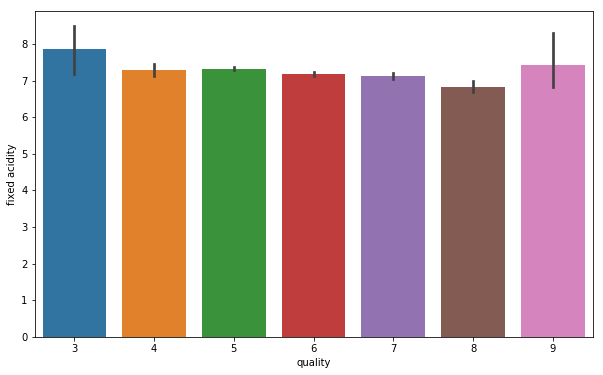

In [7]:
#fixed acidity does not determine quality
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'fixed acidity', data = raw_data)

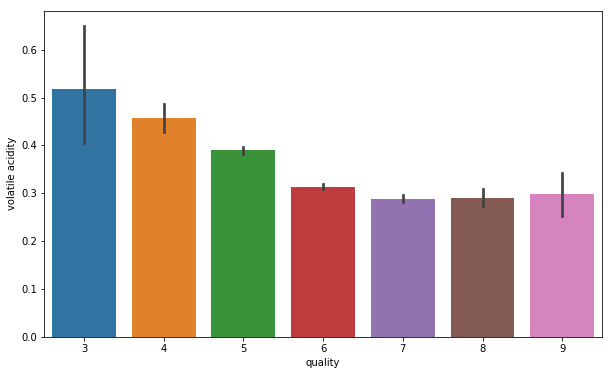

In [8]:
#volatile acidity decreases as quality improves
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'volatile acidity', data = raw_data)

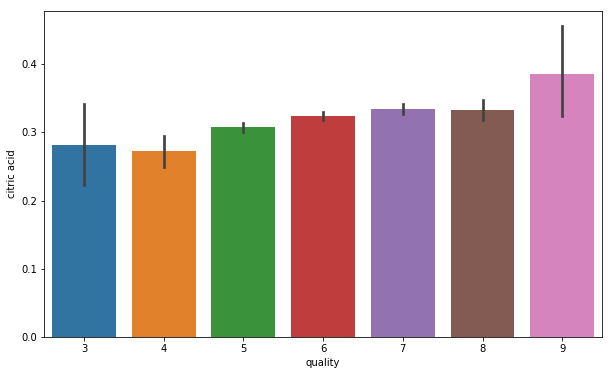

In [9]:
#citric acid increases as wine quality increases
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'citric acid', data = raw_data)

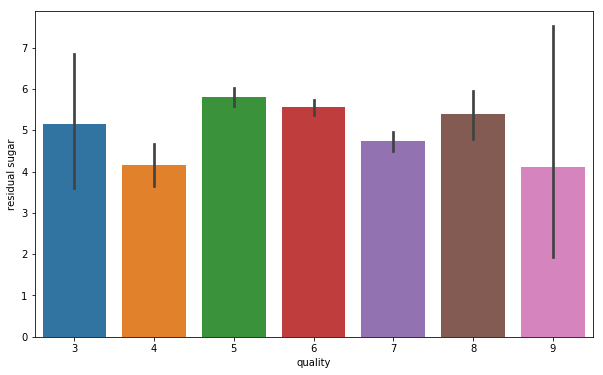

In [10]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'residual sugar', data = raw_data)

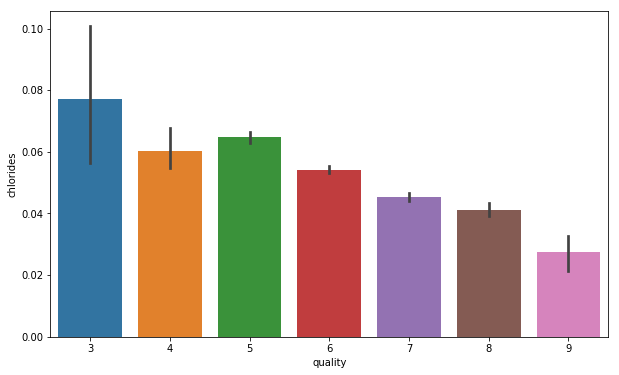

In [11]:
#chloride goes down as quality increases
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'chlorides', data = raw_data)

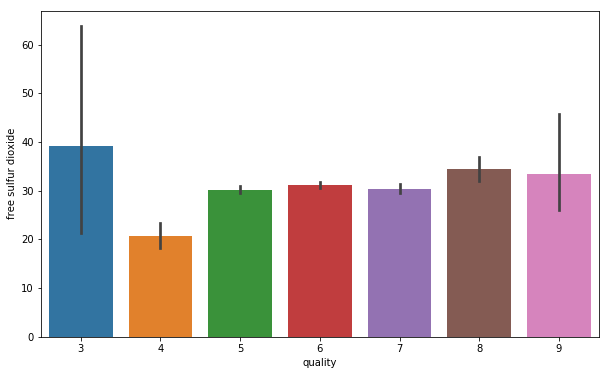

In [12]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = raw_data)

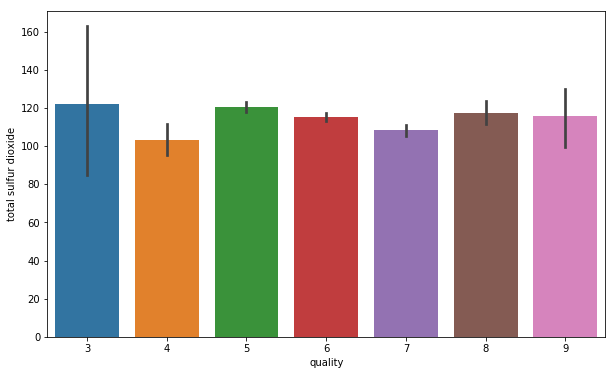

In [13]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = raw_data)

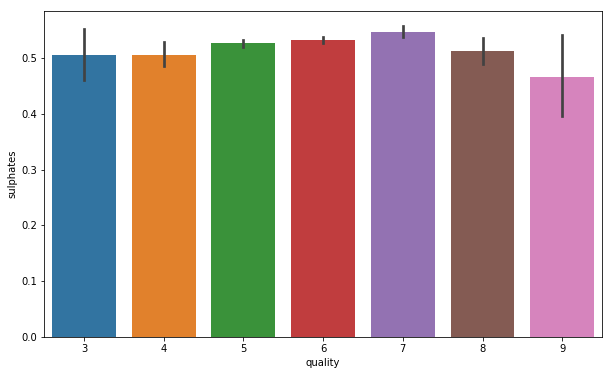

In [14]:
#sulphates increase with quality of wine
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'sulphates', data = raw_data)

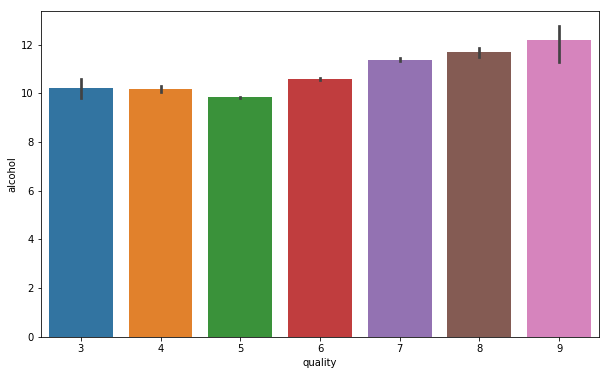

In [15]:
#alcohol higher with higher quality
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'alcohol', data = raw_data)

In [16]:
raw_data['type'] = pd.factorize(raw_data.type)[0]

In [17]:
#Are there null values?
raw_data.isnull().sum(axis=0)

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [18]:
count = np.unique(raw_data.loc[:, raw_data.columns == 'quality'], return_counts=True)
count

(array([3, 4, 5, 6, 7, 8, 9], dtype=int64),
 array([  30,  216, 2138, 2836, 1079,  193,    5], dtype=int64))

<BarContainer object of 7 artists>

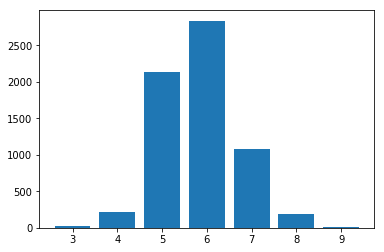

In [19]:
plt.bar(count[0], count[1])

In [20]:
clean_data=raw_data.copy()

In [21]:
#create bins
reviews = []
for i in clean_data['quality']:
    if i >= 0 and i <= 4:
        reviews.append('0') #bad
    elif i >= 5 and i <= 7:
        reviews.append('1') #ok
    elif i >= 8 and i <= 10:
        reviews.append('2') #good
clean_data['reviews'] = reviews

In [22]:
clean_data.drop(['quality'], axis=1,inplace=True)

In [23]:
X = clean_data.loc[:, clean_data.columns != 'reviews']
y = clean_data.loc[:, clean_data.columns == 'reviews']

In [291]:
np.unique(y, return_counts=True)

(array(['0', '1', '2'], dtype=object), array([ 246, 6053,  198], dtype=int64))

In [294]:
198/(246+6053+198)*100

3.047560412498076

In [24]:
#use knn to fill in the missing values
import sys
from impyute.imputation.cs import fast_knn
sys.setrecursionlimit(100000) #Increase the recursion limit of the OS

# start the KNN training
knn_X=fast_knn(X.values, k=2)

In [25]:
data = pd.DataFrame(data=knn_X, columns=X.columns)
data['reviews'] = y

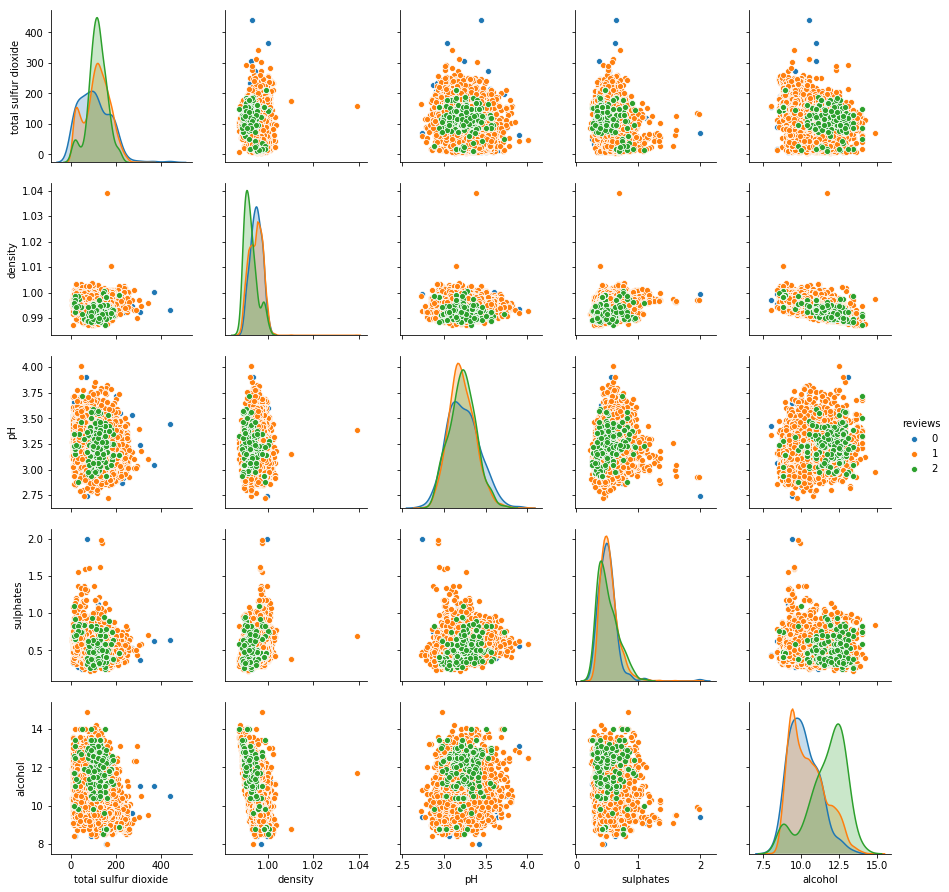

In [26]:
pp_reviews1 = sns.pairplot(data, vars = ["total sulfur dioxide","density","pH","sulphates","alcohol"], hue="reviews")

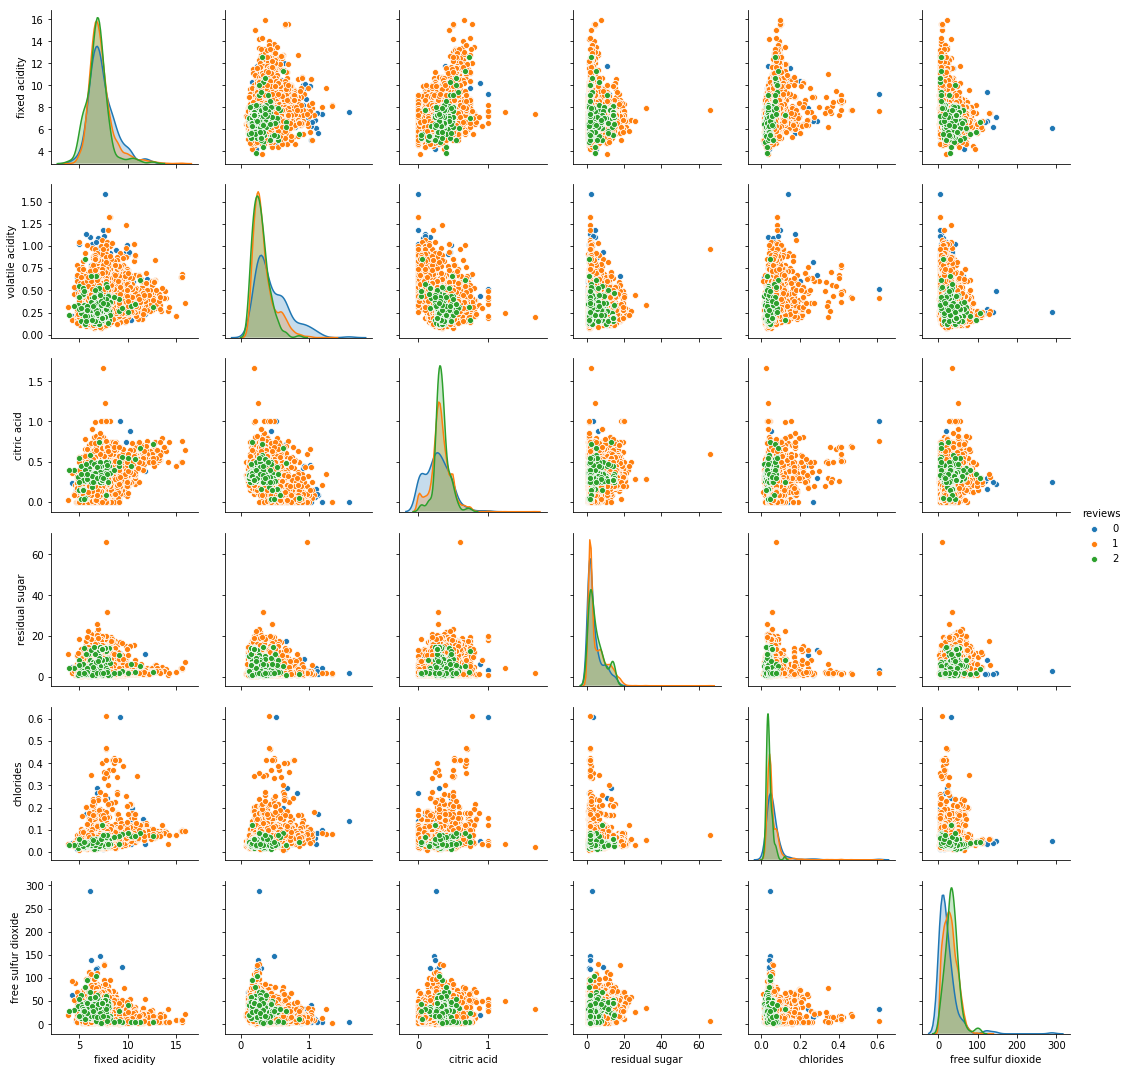

In [27]:
pp_reviews2 = sns.pairplot(data, vars = ["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide"], hue="reviews")

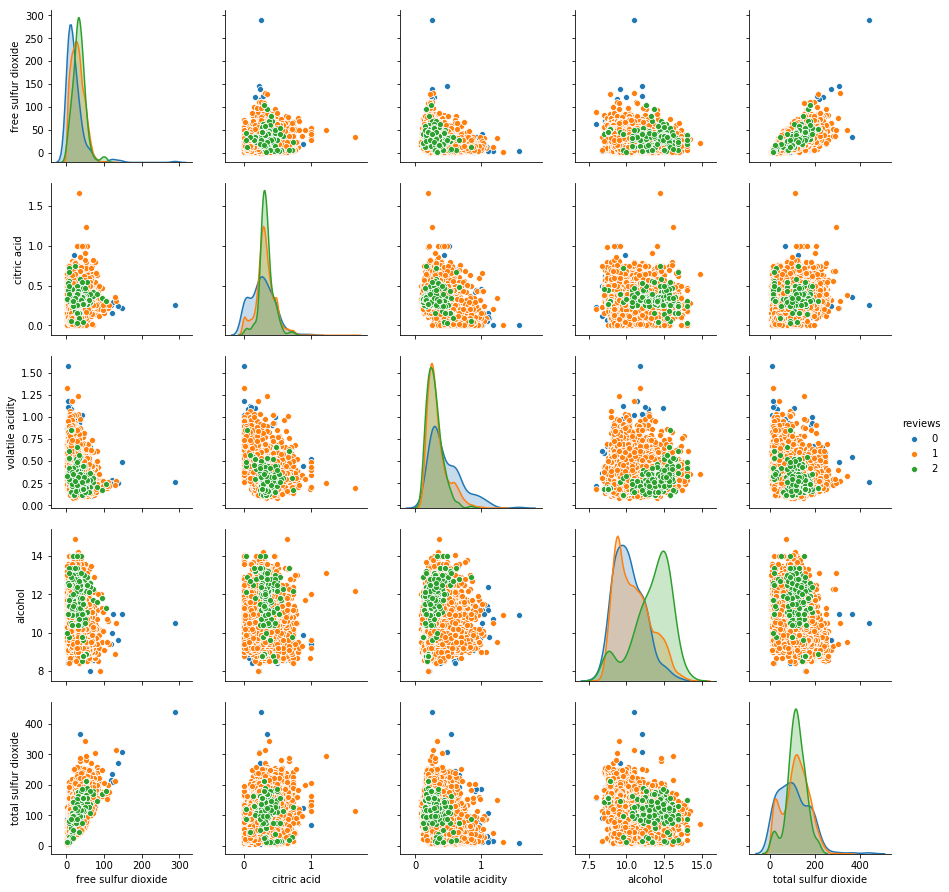

In [28]:
list_mostdifferentiating_features = ["free sulfur dioxide", "citric acid", "volatile acidity", "alcohol","total sulfur dioxide"]
pp_reviews3 = sns.pairplot(data, vars = list_mostdifferentiating_features, hue="reviews")

## Test/Train

In [283]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(knn_X, y, test_size=0.3, random_state=42, stratify=y)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4547, 12)
(1950, 12)
(4547, 1)
(1950, 1)


In [285]:
y_train.reviews.value_counts()

1    4236
0     172
2     139
Name: reviews, dtype: int64

In [284]:
y_test.reviews.value_counts()

1    1817
0      74
2      59
Name: reviews, dtype: int64

# SMOTE Balance Red & White

Balancing red & white wines did not improve accuracy for class 0 & 2. 

In [30]:
raw_data = raw_data.fillna(raw_data.mean())

In [31]:
raw_data.isnull().sum(axis=0)

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [32]:
raw_data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,0,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,0,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,0,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,0,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [33]:
X_new = raw_data.loc[:, clean_data.columns != 'type']
y_new = raw_data.loc[:, clean_data.columns == 'type']

print(X_new.shape)
print(y_new.shape)

(6497, 12)
(6497, 1)


In [34]:
from sklearn.model_selection import train_test_split

X_train_rw, X_test_rw, y_train_rw, y_test_rw = train_test_split(X_new, y_new, test_size=0.3,random_state=42)

print(X_train_rw.shape)
print(X_test_rw.shape)
print(y_train_rw.shape)
print(y_test_rw.shape)

(4547, 12)
(1950, 12)
(4547, 1)
(1950, 1)


In [35]:
from imblearn.over_sampling import SMOTE
sm1 = SMOTE(random_state=45, ratio=1)
X_trans, y_trans = sm1.fit_sample(X_train_rw, np.ravel(y_train_rw,order='C'))

print(X_trans.shape)
print(y_trans.shape)

(6850, 12)
(6850,)


In [36]:
object = np.insert(X_trans, 0, values=y_trans, axis=1)

print(object.shape)
np.unique(object[:, -1], return_counts=True)

(6850, 13)


(array([3.        , 3.06981613, 3.10119051, ..., 7.95893389, 8.        ,
        9.        ]), array([ 24,   1,   1, ...,   1, 143,   5], dtype=int64))

In [37]:
type_X = object[:, :12]
type_y = object[:, -1]

In [38]:
#bins
#bins = np.array([])
#type_y = np.digitize(type_y,bins,right=True)

reviews2 = []
for i in type_y:
    if i >= 0 and i < 5:
        reviews2.append('0') #bad
    elif i >= 5 and i < 8:
        reviews2.append('1') #ok
    elif i >= 8 and i < 10:
        reviews2.append('2') #good

np.unique(reviews2, return_counts=True)

(array(['0', '1', '2'], dtype='<U1'), array([ 297, 6405,  148], dtype=int64))

In [39]:
y_train_rw = np.asarray(reviews2)
X_train_rw = type_X

In [40]:
print(X_train_rw.shape)
print(X_test_rw.shape)
print(y_train_rw.shape)
print(y_test_rw.shape)

(6850, 12)
(1950, 12)
(6850,)
(1950, 1)


## SMOTE Balance Categories

In [41]:
count = np.unique(y_train, return_counts=True)
count

(array(['0', '1', '2'], dtype=object), array([ 177, 4226,  144], dtype=int64))

<BarContainer object of 3 artists>

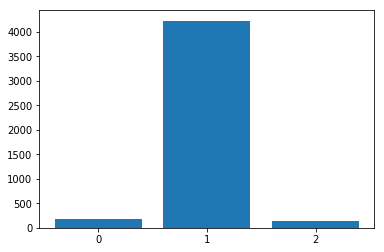

In [42]:
#plot classes
plt.bar(count[0], count[1])

In [43]:
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
#sm = SMOTE(sampling_strategy='not majority', random_state=45, k_neighbors=5)
sm= SMOTEENN(sampling_strategy='all')
X_train_res, y_train_res = sm.fit_sample(X_train, np.ravel(y_train,order='C'))

(array(['0', '1', '2'], dtype=object), array([3812, 2500, 3999], dtype=int64))


<BarContainer object of 3 artists>

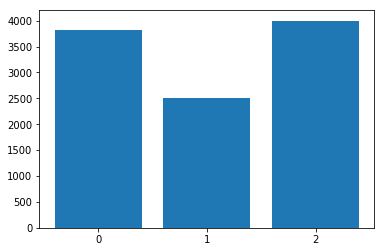

In [44]:
count = np.unique(y_train_res, return_counts=True)
print(count)
plt.bar(count[0], count[1])

## Normalization

In [45]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train_res = scaler.fit_transform(X_train_res)

X_train_rw = scaler.fit_transform(X_train_rw)

#X_train_nn = scaler.fit_transform(X_train_nn)
#X_test_nn = scaler.fit_transform(X_test_nn)

## Base Model

In [46]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import SGDClassifier

In [47]:
random_forest = RandomForestClassifier(n_estimators=100,random_state=42)
simple_rf = random_forest.fit(X_train, np.ravel(y_train,order='C'))

simple_rf.score(X_train, y_train)
acc_random_forest = round(simple_rf.score(X_train, y_train) * 100, 2)
test_acc_random_forest = round(simple_rf.score(X_test, y_test) * 100, 2)

print("Accuracy score (training):",acc_random_forest)
print("Accuracy score (test):",test_acc_random_forest)

Accuracy score (training): 100.0
Accuracy score (test): 94.41


In [48]:
importances = pd.DataFrame({'feature':X.columns,'importance':np.round(simple_rf.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances

,importance
feature,
free sulfur dioxide,0.111
volatile acidity,0.101
total sulfur dioxide,0.095
density,0.093
sulphates,0.092
residual sugar,0.091
alcohol,0.086
pH,0.083
chlorides,0.082


In [49]:
simple_rf_predict_y = random_forest.predict(X_test)
simple_rf_predict_prob = random_forest.predict_proba(X_test)

from sklearn.metrics import confusion_matrix

print('Confusion Matrix - Test Dataset')

print(confusion_matrix(y_test,simple_rf_predict_y))

from sklearn.metrics import classification_report

print(classification_report(y_test,simple_rf_predict_y))

Confusion Matrix - Test Dataset
[[   7   62    0]
 [   9 1818    0]
 [   0   38   16]]
              precision    recall  f1-score   support

           0       0.44      0.10      0.16        69
           1       0.95      1.00      0.97      1827
           2       1.00      0.30      0.46        54

   micro avg       0.94      0.94      0.94      1950
   macro avg       0.80      0.46      0.53      1950
weighted avg       0.93      0.94      0.93      1950



## Base Model w/ Smote

Test accuracy went down (compared to base model) as expected because classes are now even.

In [50]:
random_forest = RandomForestClassifier(n_estimators=100,random_state=42)
simple_rf = random_forest.fit(X_train_res, np.ravel(y_train_res,order='C'))

simple_rf.score(X_train_res, y_train_res)
acc_random_forest = round(simple_rf.score(X_train_res, y_train_res) * 100, 2)
test_acc_random_forest = round(simple_rf.score(X_test, y_test) * 100, 2)

print("Accuracy score (training):",acc_random_forest)
print("Accuracy score (test):",test_acc_random_forest)

Accuracy score (training): 100.0
Accuracy score (test): 63.18


In [51]:
simple_rf_predict_y = simple_rf.predict(X_train_res)
simple_rf_predict_prob = simple_rf.predict_proba(X_train_res)

from sklearn.metrics import confusion_matrix

print('Confusion Matrix - Test Dataset')

print(confusion_matrix(y_train_res,simple_rf_predict_y))

from sklearn.metrics import classification_report

print(classification_report(y_train_res,simple_rf_predict_y))

Confusion Matrix - Test Dataset
[[3812    0    0]
 [   0 2500    0]
 [   0    0 3999]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3812
           1       1.00      1.00      1.00      2500
           2       1.00      1.00      1.00      3999

   micro avg       1.00      1.00      1.00     10311
   macro avg       1.00      1.00      1.00     10311
weighted avg       1.00      1.00      1.00     10311



In [52]:
simple_rf_predict_y = simple_rf.predict(X_test)
simple_rf_predict_prob = simple_rf.predict_proba(X_test)

from sklearn.metrics import confusion_matrix

print('Confusion Matrix - Test Dataset')

print(confusion_matrix(y_test,simple_rf_predict_y))

from sklearn.metrics import classification_report

print(classification_report(y_test,simple_rf_predict_y))

Confusion Matrix - Test Dataset
[[  45   22    2]
 [ 457 1156  214]
 [   3   20   31]]
              precision    recall  f1-score   support

           0       0.09      0.65      0.16        69
           1       0.96      0.63      0.76      1827
           2       0.13      0.57      0.21        54

   micro avg       0.63      0.63      0.63      1950
   macro avg       0.39      0.62      0.38      1950
weighted avg       0.91      0.63      0.73      1950



## Random Forest

In [53]:
#base model params
simple_rf.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

### Random Forest (SMOTE) - Random Search

In [54]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 1500, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 110, num = 15)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
                'criterion': ['gini','entropy']}

print(random_grid)

{'n_estimators': [50, 211, 372, 533, 694, 855, 1016, 1177, 1338, 1500], 'max_features': ['auto', 'sqrt'], 'max_depth': [1, 8, 16, 24, 32, 39, 47, 55, 63, 71, 78, 86, 94, 102, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False], 'criterion': ['gini', 'entropy']}


In [55]:
rf_random = RandomizedSearchCV(estimator = random_forest, param_distributions = random_grid, n_iter = 60, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train_res, y_train_res)

rf_random.best_params_

Fitting 3 folds for each of 60 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 14.4min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed: 16.6min finished


{'n_estimators': 1500,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 47,
 'criterion': 'gini',
 'bootstrap': False}

In [56]:
rf_model = rf_random.best_estimator_

acc_rf = round(rf_model.score(X_train_res, y_train_res) * 100, 2)
test_acc_rf = round(rf_model.score(X_test, y_test) * 100, 2)

print("Accuracy score (training):",acc_rf)
print("Accuracy score (test):",test_acc_rf)

Accuracy score (training): 100.0
Accuracy score (test): 66.67


In [296]:
importances = pd.DataFrame({'feature':X.columns,'importance':np.round(rf_model.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances

,importance
feature,
alcohol,0.173
free sulfur dioxide,0.144
total sulfur dioxide,0.109
density,0.095
volatile acidity,0.090
residual sugar,0.081
chlorides,0.071
sulphates,0.061
fixed acidity,0.056


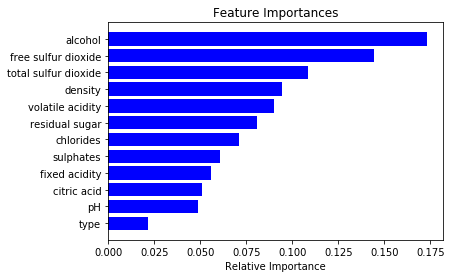

In [297]:
features = X.columns
importances = rf_model.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [57]:
rf_predict_y = rf_model.predict(X_test)
rf_predict_prob = rf_model.predict_proba(X_test)

from sklearn.metrics import confusion_matrix

print('Confusion Matrix - Test Dataset')

print(confusion_matrix(y_test,rf_predict_y))

from sklearn.metrics import classification_report

print(classification_report(y_test,rf_predict_y))

Confusion Matrix - Test Dataset
[[  42   26    1]
 [ 437 1231  159]
 [   3   24   27]]
              precision    recall  f1-score   support

           0       0.09      0.61      0.15        69
           1       0.96      0.67      0.79      1827
           2       0.14      0.50      0.22        54

   micro avg       0.67      0.67      0.67      1950
   macro avg       0.40      0.59      0.39      1950
weighted avg       0.91      0.67      0.75      1950



### Random Forest (w/o SMOTE) - Random Search

In [58]:
rf_random_2 = RandomizedSearchCV(estimator = random_forest, param_distributions = random_grid, n_iter = 60, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random_2.fit(X_train, y_train)

rf_random_2.best_params_

Fitting 3 folds for each of 60 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   35.6s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  4.3min finished
C:\Users\Sasha\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:740: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


{'n_estimators': 372,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 110,
 'criterion': 'gini',
 'bootstrap': True}

In [59]:
best_rf_model = rf_random_2.best_estimator_

acc_best_rf = round(best_rf_model.score(X_train, y_train) * 100, 2)
test_acc_best_rf = round(best_rf_model.score(X_test, y_test) * 100, 2)

print("Accuracy score (training):",acc_best_rf)
print("Accuracy score (test):",test_acc_best_rf)

Accuracy score (training): 100.0
Accuracy score (test): 94.56


In [60]:
rf_predict_y = best_rf_model.predict(X_test)
rf_predict_prob = best_rf_model.predict_proba(X_test)

from sklearn.metrics import confusion_matrix

print('Confusion Matrix - Test Dataset')

print(confusion_matrix(y_test,rf_predict_y))

from sklearn.metrics import classification_report

print(classification_report(y_test,rf_predict_y))

Confusion Matrix - Test Dataset
[[   8   61    0]
 [   7 1820    0]
 [   0   38   16]]
              precision    recall  f1-score   support

           0       0.53      0.12      0.19        69
           1       0.95      1.00      0.97      1827
           2       1.00      0.30      0.46        54

   micro avg       0.95      0.95      0.95      1950
   macro avg       0.83      0.47      0.54      1950
weighted avg       0.94      0.95      0.93      1950



## Decision Tree

### Decision Tree (SMOTE)

In [61]:
dt = DecisionTreeClassifier()

simple_dt = dt.fit(X_train_res, np.ravel(y_train_res,order='C'))

simple_dt.score(X_train_res, y_train_res)
acc_dt = round(simple_dt.score(X_train_res, y_train_res) * 100, 2)
test_acc_dt = round(simple_dt.score(X_test, y_test) * 100, 2)

print("Accuracy score (training):",acc_dt)
print("Accuracy score (test):",test_acc_dt)

Accuracy score (training): 100.0
Accuracy score (test): 57.08


In [62]:
dt_predict_y = simple_dt.predict(X_test)
dt_predict_prob = simple_dt.predict_proba(X_test)

from sklearn.metrics import confusion_matrix

print('Confusion Matrix - Test Dataset')

print(confusion_matrix(y_test,dt_predict_y))

from sklearn.metrics import classification_report

print(classification_report(y_test,dt_predict_y))

Confusion Matrix - Test Dataset
[[  40   24    5]
 [ 517 1047  263]
 [   3   25   26]]
              precision    recall  f1-score   support

           0       0.07      0.58      0.13        69
           1       0.96      0.57      0.72      1827
           2       0.09      0.48      0.15        54

   micro avg       0.57      0.57      0.57      1950
   macro avg       0.37      0.54      0.33      1950
weighted avg       0.90      0.57      0.68      1950



In [63]:
dt.get_params().keys()

dict_keys(['class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'presort', 'random_state', 'splitter'])

In [64]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 50, stop = 1500, num = 10)]
max_features = ['none','auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(1, 110, num = 10)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]

random_grid = {'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               #'splitter': ['best','random'],
                'criterion': ['gini','entropy'],
                'class_weight':['balanced']}

print(random_grid)

{'max_depth': [1, 13, 25, 37, 49, 61, 73, 85, 97, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'criterion': ['gini', 'entropy'], 'class_weight': ['balanced']}


In [65]:
dt_random_smote = RandomizedSearchCV(estimator = dt, param_distributions = random_grid, n_iter = 60, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
dt_random_smote.fit(X_train_res, y_train_res)

dt_random_smote.best_params_

Fitting 3 folds for each of 60 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    6.6s finished


{'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_depth': 97,
 'criterion': 'entropy',
 'class_weight': 'balanced'}

In [66]:
smote_dt_model = dt_random_smote.best_estimator_

acc_best_dt = round(smote_dt_model.score(X_train_res, y_train_res) * 100, 2)
test_acc_best_dt = round(smote_dt_model.score(X_test, y_test) * 100, 2)

print("Accuracy score (training):",acc_best_dt)
print("Accuracy score (test):",test_acc_best_dt)

Accuracy score (training): 100.0
Accuracy score (test): 55.54


In [67]:
dt_predict_y = smote_dt_model.predict(X_test)
dt_predict_prob = smote_dt_model.predict_proba(X_test)

from sklearn.metrics import confusion_matrix

print('Confusion Matrix - Test Dataset')

print(confusion_matrix(y_test,dt_predict_y))

from sklearn.metrics import classification_report

print(classification_report(y_test,dt_predict_y))

Confusion Matrix - Test Dataset
[[  46   19    4]
 [ 528 1005  294]
 [   1   21   32]]
              precision    recall  f1-score   support

           0       0.08      0.67      0.14        69
           1       0.96      0.55      0.70      1827
           2       0.10      0.59      0.17        54

   micro avg       0.56      0.56      0.56      1950
   macro avg       0.38      0.60      0.34      1950
weighted avg       0.91      0.56      0.67      1950



### Decision Tree (w/o SMOTE)

In [68]:
dt = DecisionTreeClassifier()

simple_dt2 = dt.fit(X_train, np.ravel(y_train,order='C'))

simple_dt2.score(X_train, y_train)
acc_dt2 = round(simple_dt2.score(X_train, y_train) * 100, 2)
test_acc_dt2 = round(simple_dt2.score(X_test, y_test) * 100, 2)

print("Accuracy score (training):",acc_dt)
print("Accuracy score (test):",test_acc_dt)

Accuracy score (training): 100.0
Accuracy score (test): 57.08


In [69]:
dt_predict_y2 = simple_dt2.predict(X_test)
dt_predict_prob2 = simple_dt2.predict_proba(X_test)

from sklearn.metrics import confusion_matrix

print('Confusion Matrix - Test Dataset')

print(confusion_matrix(y_test,dt_predict_y2))

from sklearn.metrics import classification_report

print(classification_report(y_test,dt_predict_y2))

Confusion Matrix - Test Dataset
[[  16   52    1]
 [  57 1726   44]
 [   1   34   19]]
              precision    recall  f1-score   support

           0       0.22      0.23      0.22        69
           1       0.95      0.94      0.95      1827
           2       0.30      0.35      0.32        54

   micro avg       0.90      0.90      0.90      1950
   macro avg       0.49      0.51      0.50      1950
weighted avg       0.91      0.90      0.91      1950



In [70]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 50, stop = 1500, num = 10)]
max_features = ['none','auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(1, 110, num = 10)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]

random_grid = {'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               #'splitter': ['best','random'],
                'criterion': ['gini','entropy'],
                'class_weight':['balanced']}

print(random_grid)

{'max_depth': [1, 13, 25, 37, 49, 61, 73, 85, 97, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'criterion': ['gini', 'entropy'], 'class_weight': ['balanced']}


In [71]:
dt_random = RandomizedSearchCV(estimator = dt, param_distributions = random_grid, n_iter = 60, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
dt_random.fit(X_train, y_train)

dt_random.best_params_

Fitting 3 folds for each of 60 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    1.6s finished


{'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_depth': 61,
 'criterion': 'gini',
 'class_weight': 'balanced'}

In [72]:
best_dt_model = dt_random.best_estimator_

acc_best_dt = round(best_dt_model.score(X_train, y_train) * 100, 2)
test_acc_best_dt = round(best_dt_model.score(X_test, y_test) * 100, 2)

print("Accuracy score (training):",acc_best_dt)
print("Accuracy score (test):",test_acc_best_dt)

Accuracy score (training): 100.0
Accuracy score (test): 90.87


In [73]:
dt_predict_y = best_dt_model.predict(X_test)
dt_predict_prob = best_dt_model.predict_proba(X_test)

from sklearn.metrics import confusion_matrix

print('Confusion Matrix - Test Dataset')

print(confusion_matrix(y_test,dt_predict_y))

from sklearn.metrics import classification_report

print(classification_report(y_test,dt_predict_y))

Confusion Matrix - Test Dataset
[[  18   51    0]
 [  53 1734   40]
 [   0   34   20]]
              precision    recall  f1-score   support

           0       0.25      0.26      0.26        69
           1       0.95      0.95      0.95      1827
           2       0.33      0.37      0.35        54

   micro avg       0.91      0.91      0.91      1950
   macro avg       0.51      0.53      0.52      1950
weighted avg       0.91      0.91      0.91      1950



## Logistic Regression

### Logistic Regression (SMOTE)

In [74]:
lr = LogisticRegression(multi_class='auto', solver='lbfgs')

simple_lr = lr.fit(X_train_res, np.ravel(y_train_res,order='C'))

simple_lr.score(X_train_res, y_train_res)
acc_lr = round(simple_lr.score(X_train_res, y_train_res) * 100, 2)
test_acc_lr = round(simple_lr.score(X_test, y_test) * 100, 2)

print("Accuracy score (training):",acc_lr)
print("Accuracy score (test):",test_acc_lr)

Accuracy score (training): 68.84
Accuracy score (test): 23.08


In [75]:
lr_predict_y = simple_lr.predict(X_test)
lr_predict_prob = simple_lr.predict_proba(X_test)

from sklearn.metrics import confusion_matrix

print('Confusion Matrix - Test Dataset')

print(confusion_matrix(y_test,lr_predict_y))

from sklearn.metrics import classification_report

print(classification_report(y_test,lr_predict_y))

Confusion Matrix - Test Dataset
[[ 52   9   8]
 [714 349 764]
 [  2   3  49]]
              precision    recall  f1-score   support

           0       0.07      0.75      0.12        69
           1       0.97      0.19      0.32      1827
           2       0.06      0.91      0.11        54

   micro avg       0.23      0.23      0.23      1950
   macro avg       0.36      0.62      0.19      1950
weighted avg       0.91      0.23      0.31      1950



### Logistic Regression (w/o SMOTE)

In [76]:
lr = LogisticRegression(multi_class='auto', solver='lbfgs')

simple_lr_2 = lr.fit(X_train, np.ravel(y_train,order='C'))

simple_lr_2.score(X_train, y_train)
acc_lr_2 = round(simple_lr_2.score(X_train, y_train) * 100, 2)
test_acc_lr_2 = round(simple_lr_2.score(X_test, y_test) * 100, 2)

print("Accuracy score (training):",acc_lr_2)
print("Accuracy score (test):",test_acc_lr_2)

Accuracy score (training): 93.01
Accuracy score (test): 93.74


We shouldn't use this model it can't predict Class 2.

In [77]:
lr_predict_y = simple_lr_2.predict(X_test)
lr_predict_prob = simple_lr_2.predict_proba(X_test)

from sklearn.metrics import confusion_matrix

print('Confusion Matrix - Test Dataset')

print(confusion_matrix(y_test,lr_predict_y))

from sklearn.metrics import classification_report

print(classification_report(y_test,lr_predict_y))

Confusion Matrix - Test Dataset
[[   2   66    1]
 [   1 1826    0]
 [   0   54    0]]
              precision    recall  f1-score   support

           0       0.67      0.03      0.06        69
           1       0.94      1.00      0.97      1827
           2       0.00      0.00      0.00        54

   micro avg       0.94      0.94      0.94      1950
   macro avg       0.54      0.34      0.34      1950
weighted avg       0.90      0.94      0.91      1950



## SVM

In [78]:
#SVM (default parameters) without SMOTE
svc = SVC()

svc_model = svc.fit(X_train, np.ravel(y_train,order='C'))

In [79]:
y_pred = svc_model.predict(X_test)

In [80]:
acc_svc = round(svc_model.score(X_train, y_train) * 100, 2)
test_acc_svc = round(svc_model.score(X_test, y_test) * 100, 2)

print("Accuracy score (training):",acc_svc)
print("Accuracy score (test):",test_acc_svc)

Accuracy score (training): 93.03
Accuracy score (test): 93.64


In [81]:
#SVM (default parameters) with SMOTE

svc_res = SVC()

svc_res_model = svc_res.fit(X_train_res, y_train_res)

In [82]:
y_pred_res = svc_res_model.predict(X_test)

acc_svc_res = round(svc_res_model.score(X_train_res, y_train_res) * 100, 2)
test_acc_svc_res = round(svc_res_model.score(X_test, y_test) * 100, 2)

print("Accuracy score (training):",acc_svc_res)
print("Accuracy score (test):",test_acc_svc_res)

Accuracy score (training): 90.57
Accuracy score (test): 49.74


New Parameters for SVM Model and GridSearch

In [83]:
from sklearn.model_selection import GridSearchCV

c = np.arange(0.01,5.5, 0.5)
c

array([0.01, 0.51, 1.01, 1.51, 2.01, 2.51, 3.01, 3.51, 4.01, 4.51, 5.01])

### SVM with SMOTE

In [84]:
param_grid = {'C':c}

svc = SVC(gamma='scale')
svc_Grid = GridSearchCV(svc, param_grid, cv = 5, verbose = 0)
svc_model = svc_Grid.fit(X_train_res, y_train_res)

In [85]:
print(svc_model.best_params_)
print(svc_model.best_estimator_)

{'C': 5.01}
SVC(C=5.01, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [86]:
best_svc = SVC(C=5.01, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [87]:
best_svc.fit(X_train_res, y_train_res)

y_preds = best_svc.predict(X_test)

In [88]:
acc_svc_res = round(best_svc.score(X_train_res, y_train_res) * 100, 2)
test_acc_svc_res = round(best_svc.score(X_test, y_test) * 100, 2)

print("Accuracy score (training):",acc_svc_res)
print("Accuracy score (test):",test_acc_svc_res)

Accuracy score (training): 93.76
Accuracy score (test): 58.72


In [89]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

print (classification_report(y_test, y_preds))
print ("Overall Accuracy:", round(accuracy_score(y_test, y_preds),4))

              precision    recall  f1-score   support

           0       0.09      0.59      0.16        69
           1       0.96      0.58      0.73      1827
           2       0.09      0.67      0.16        54

   micro avg       0.59      0.59      0.59      1950
   macro avg       0.38      0.62      0.35      1950
weighted avg       0.91      0.59      0.69      1950

Overall Accuracy: 0.5872


SVM Without SMOTE

In [90]:
param_grid = {'C':c}

svc = SVC(gamma='scale')
svc_noSmote_Grid = GridSearchCV(svc, param_grid, cv = 5, verbose = 0)
svc_noSmote_model = svc_Grid.fit(X_train, np.ravel(y_train,order='C'))

In [91]:
print(svc_noSmote_model.best_params_)
print(svc_noSmote_model.best_estimator_)

{'C': 0.01}
SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [92]:
best_noSmote_svc = SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [93]:
best_noSmote_svc.fit(X_train, np.ravel(y_train,order='C'))

y_preds = best_noSmote_svc.predict(X_test)

In [94]:
acc_svc = round(best_noSmote_svc.score(X_train, np.ravel(y_train,order='C')) * 100, 2)
test_acc_svc = round(best_noSmote_svc.score(X_test, y_test) * 100, 2)

print("Accuracy score (training):",acc_svc)
print("Accuracy score (test):",test_acc_svc)

Accuracy score (training): 92.94
Accuracy score (test): 93.69


In [95]:
print (classification_report(y_test, y_preds))
print ("Overall Accuracy:", round(accuracy_score(y_test, y_preds),4))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        69
           1       0.94      1.00      0.97      1827
           2       0.00      0.00      0.00        54

   micro avg       0.94      0.94      0.94      1950
   macro avg       0.31      0.33      0.32      1950
weighted avg       0.88      0.94      0.91      1950

Overall Accuracy: 0.9369


C:\Users\Sasha\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sasha\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sasha\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Neural Nets

In [96]:
import keras
from sklearn import preprocessing, model_selection 
from keras.models import Sequential 
from keras import layers, optimizers, regularizers
from keras.layers import Dense, Dropout, BatchNormalization, Activation

Using TensorFlow backend.


In [301]:
## convert output to one-hot encoding
#Y_train_res = keras.utils.to_categorical(y_train_res-1,3)
#Y_test_res = keras.utils.to_categorical(X_test_res-1,3)

Y_train = pd.get_dummies(y_train)

In [302]:
winemod1 = Sequential()

# layer 1
winemod1.add(Dense(30, input_dim=12, activation='relu', name='fc0',kernel_regularizer=regularizers.l2(0.01)))
winemod1.add(BatchNormalization(momentum=0.99, epsilon=0.001))

#layer 2
winemod1.add(Dense(50, name='fc1',bias_initializer='zeros'))
winemod1.add(BatchNormalization(momentum=0.99, epsilon=0.001))
winemod1.add(Activation('tanh'))
winemod1.add(Dropout(0.5))

#layer 3
winemod1.add(Dense(100, name='fc2',bias_initializer='zeros'))
winemod1.add(BatchNormalization(momentum=0.99, epsilon=0.001))
winemod1.add(Activation('relu'))
winemod1.add(Dropout(0.5))

#layer 4
winemod1.add(Dense(3, name='fc3',bias_initializer='zeros'))
winemod1.add(BatchNormalization(momentum=0.99, epsilon=0.001))
winemod1.add(Activation('softmax'))

In [303]:
Adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
winemod1.compile(optimizer = Adam, loss = "categorical_crossentropy", metrics = ["categorical_accuracy"])

In [304]:
winemod1.fit(x = X_train, y = Y_train, epochs = 200,verbose=1, batch_size = 64)

Epoch 1/200
4547/4547 [==============================] - 2s 359us/step - loss: 1.3448 - categorical_accuracy: 0.3835
Epoch 2/200
4547/4547 [==============================] - 0s 58us/step - loss: 1.0943 - categorical_accuracy: 0.5738
Epoch 3/200
4547/4547 [==============================] - 0s 60us/step - loss: 0.9748 - categorical_accuracy: 0.7565
Epoch 4/200
4547/4547 [==============================] - 0s 54us/step - loss: 0.8839 - categorical_accuracy: 0.8713
Epoch 5/200
4547/4547 [==============================] - 0s 54us/step - loss: 0.8088 - categorical_accuracy: 0.9136
Epoch 6/200
4547/4547 [==============================] - 0s 67us/step - loss: 0.7442 - categorical_accuracy: 0.9248
Epoch 7/200
4547/4547 [==============================] - 0s 55us/step - loss: 0.6916 - categorical_accuracy: 0.9285
Epoch 8/200
4547/4547 [==============================] - 0s 55us/step - loss: 0.6443 - categorical_accuracy: 0.9309
Epoch 9/200
4547/4547 [==============================] - 0s 56us/step -

4547/4547 [==============================] - 0s 56us/step - loss: 0.2662 - categorical_accuracy: 0.9314
Epoch 71/200
4547/4547 [==============================] - 0s 62us/step - loss: 0.2679 - categorical_accuracy: 0.9316
Epoch 72/200
4547/4547 [==============================] - 0s 53us/step - loss: 0.2712 - categorical_accuracy: 0.9318
Epoch 73/200
4547/4547 [==============================] - 0s 56us/step - loss: 0.2669 - categorical_accuracy: 0.9318
Epoch 74/200
4547/4547 [==============================] - 0s 53us/step - loss: 0.2690 - categorical_accuracy: 0.9314
Epoch 75/200
4547/4547 [==============================] - 0s 56us/step - loss: 0.2661 - categorical_accuracy: 0.9316
Epoch 76/200
4547/4547 [==============================] - 0s 52us/step - loss: 0.2669 - categorical_accuracy: 0.9314
Epoch 77/200
4547/4547 [==============================] - 0s 56us/step - loss: 0.2696 - categorical_accuracy: 0.9309
Epoch 78/200
4547/4547 [==============================] - 0s 54us/step - loss

4547/4547 [==============================] - 0s 58us/step - loss: 0.2579 - categorical_accuracy: 0.9320
Epoch 140/200
4547/4547 [==============================] - 0s 53us/step - loss: 0.2591 - categorical_accuracy: 0.9325
Epoch 141/200
4547/4547 [==============================] - 0s 56us/step - loss: 0.2568 - categorical_accuracy: 0.9316
Epoch 142/200
4547/4547 [==============================] - 0s 60us/step - loss: 0.2612 - categorical_accuracy: 0.9312
Epoch 143/200
4547/4547 [==============================] - 0s 55us/step - loss: 0.2570 - categorical_accuracy: 0.9327
Epoch 144/200
4547/4547 [==============================] - 0s 59us/step - loss: 0.2564 - categorical_accuracy: 0.9320
Epoch 145/200
4547/4547 [==============================] - 0s 55us/step - loss: 0.2597 - categorical_accuracy: 0.9312
Epoch 146/200
4547/4547 [==============================] - 0s 56us/step - loss: 0.2604 - categorical_accuracy: 0.9307
Epoch 147/200
4547/4547 [==============================] - 0s 61us/ste

In [305]:
Y_test = pd.get_dummies(y_test)

pred = winemod1.evaluate(x = X_test, y = Y_test, batch_size=64)
loss_f = pred[0]
accuracy_f= pred[1]
print ("Loss = " + str(loss_f))
print ("Test Accuracy = " + str(accuracy_f))

1950/1950 [==============================] - 0s 79us/step
Loss = 0.2989293559086628
Test Accuracy = 0.9317948818206787


In [312]:
y = pd.get_dummies(y)

X_4k = X_train[:4000] # first columns

Y_4k = Y_train.iloc[:4000,].values # last columns

X_4k= preprocessing.normalize(X_4k, axis = 0)

#X_4k_train,X_4k_test,Y_4k_train,Y_4k_test = model_selection.train_test_split(X_4k,Y_4k,test_size=0.2)

#print(X_4k_train.shape,Y_4k_train.shape,X_4k_test.shape,Y_4k_test.shape)

In [313]:
winemod1.fit(x = X_4k_train, y = Y_4k_train, epochs = 200,verbose=1, batch_size = 64)

Epoch 1/200
3200/3200 [==============================] - 0s 58us/step - loss: 0.2962 - categorical_accuracy: 0.9150
Epoch 2/200
3200/3200 [==============================] - 0s 54us/step - loss: 0.2872 - categorical_accuracy: 0.9187
Epoch 3/200
3200/3200 [==============================] - 0s 54us/step - loss: 0.2881 - categorical_accuracy: 0.9194
Epoch 4/200
3200/3200 [==============================] - 0s 59us/step - loss: 0.2867 - categorical_accuracy: 0.9178
Epoch 5/200
3200/3200 [==============================] - 0s 61us/step - loss: 0.2896 - categorical_accuracy: 0.9166
Epoch 6/200
3200/3200 [==============================] - 0s 69us/step - loss: 0.2861 - categorical_accuracy: 0.9191
Epoch 7/200
3200/3200 [==============================] - 0s 64us/step - loss: 0.2833 - categorical_accuracy: 0.9178
Epoch 8/200
3200/3200 [==============================] - 0s 56us/step - loss: 0.2801 - categorical_accuracy: 0.9187
Epoch 9/200
3200/3200 [==============================] - 0s 57us/step - 

3200/3200 [==============================] - 0s 57us/step - loss: 0.2795 - categorical_accuracy: 0.9178
Epoch 71/200
3200/3200 [==============================] - 0s 53us/step - loss: 0.2827 - categorical_accuracy: 0.9172
Epoch 72/200
3200/3200 [==============================] - 0s 65us/step - loss: 0.2829 - categorical_accuracy: 0.9166
Epoch 73/200
3200/3200 [==============================] - 0s 60us/step - loss: 0.2783 - categorical_accuracy: 0.9175
Epoch 74/200
3200/3200 [==============================] - 0s 54us/step - loss: 0.2776 - categorical_accuracy: 0.9181
Epoch 75/200
3200/3200 [==============================] - 0s 56us/step - loss: 0.2834 - categorical_accuracy: 0.9181
Epoch 76/200
3200/3200 [==============================] - 0s 56us/step - loss: 0.2790 - categorical_accuracy: 0.9172
Epoch 77/200
3200/3200 [==============================] - 0s 53us/step - loss: 0.2777 - categorical_accuracy: 0.9178
Epoch 78/200
3200/3200 [==============================] - 0s 59us/step - loss

3200/3200 [==============================] - 0s 63us/step - loss: 0.2823 - categorical_accuracy: 0.9166
Epoch 140/200
3200/3200 [==============================] - 0s 55us/step - loss: 0.2815 - categorical_accuracy: 0.9166
Epoch 141/200
3200/3200 [==============================] - 0s 56us/step - loss: 0.2774 - categorical_accuracy: 0.9194
Epoch 142/200
3200/3200 [==============================] - 0s 60us/step - loss: 0.2766 - categorical_accuracy: 0.9172
Epoch 143/200
3200/3200 [==============================] - 0s 55us/step - loss: 0.2810 - categorical_accuracy: 0.9153
Epoch 144/200
3200/3200 [==============================] - 0s 59us/step - loss: 0.2829 - categorical_accuracy: 0.9172
Epoch 145/200
3200/3200 [==============================] - 0s 55us/step - loss: 0.2772 - categorical_accuracy: 0.9184
Epoch 146/200
3200/3200 [==============================] - 0s 66us/step - loss: 0.2798 - categorical_accuracy: 0.9194
Epoch 147/200
3200/3200 [==============================] - 0s 57us/ste

In [315]:
pred_4k = winemod1.evaluate(x = X_4k_test, y = Y_4k_test, batch_size=64)
loss_4k_f = pred_4k[0]
accuracy_4k_f= pred_4k[1]
print ("Loss = " + str(loss_4k_f))
print ("Test Accuracy = " + str(accuracy_4k_f))

800/800 [==============================] - 0s 26us/step
Loss = 0.30142352640628817
Test Accuracy = 0.925000011920929


In [316]:
X_2k = X_train[:2000] # first columns

Y_2k = Y_train.iloc[:2000,].values # last columns

X_2k= preprocessing.normalize(X_2k, axis = 0)

#X_2k_train,X_2k_test,Y_2k_train,Y_2k_test = model_selection.train_test_split(X_2k,Y_2k,test_size=0.2)

#print(X_2k_train.shape,Y_2k_train.shape,X_2k_test.shape,Y_2k_test.shape)

In [317]:
winemod1.fit(x = X_2k_train, y = Y_2k_train, epochs = 200,verbose=1, batch_size = 64)

Epoch 1/200
1600/1600 [==============================] - 0s 58us/step - loss: 0.2964 - categorical_accuracy: 0.9106
Epoch 2/200
1600/1600 [==============================] - 0s 65us/step - loss: 0.2785 - categorical_accuracy: 0.9131
Epoch 3/200
1600/1600 [==============================] - 0s 56us/step - loss: 0.2733 - categorical_accuracy: 0.9137
Epoch 4/200
1600/1600 [==============================] - 0s 54us/step - loss: 0.2788 - categorical_accuracy: 0.9119
Epoch 5/200
1600/1600 [==============================] - 0s 56us/step - loss: 0.2744 - categorical_accuracy: 0.9144
Epoch 6/200
1600/1600 [==============================] - 0s 57us/step - loss: 0.2770 - categorical_accuracy: 0.9137
Epoch 7/200
1600/1600 [==============================] - 0s 55us/step - loss: 0.2874 - categorical_accuracy: 0.9137
Epoch 8/200
1600/1600 [==============================] - 0s 55us/step - loss: 0.2774 - categorical_accuracy: 0.9131
Epoch 9/200
1600/1600 [==============================] - 0s 55us/step - 

1600/1600 [==============================] - 0s 57us/step - loss: 0.2634 - categorical_accuracy: 0.9181
Epoch 72/200
1600/1600 [==============================] - 0s 54us/step - loss: 0.2717 - categorical_accuracy: 0.9119
Epoch 73/200
1600/1600 [==============================] - 0s 55us/step - loss: 0.2712 - categorical_accuracy: 0.9094
Epoch 74/200
1600/1600 [==============================] - 0s 59us/step - loss: 0.2825 - categorical_accuracy: 0.9106
Epoch 75/200
1600/1600 [==============================] - 0s 60us/step - loss: 0.2695 - categorical_accuracy: 0.9156
Epoch 76/200
1600/1600 [==============================] - 0s 57us/step - loss: 0.2684 - categorical_accuracy: 0.9119
Epoch 77/200
1600/1600 [==============================] - 0s 61us/step - loss: 0.2769 - categorical_accuracy: 0.9125
Epoch 78/200
1600/1600 [==============================] - 0s 69us/step - loss: 0.2729 - categorical_accuracy: 0.9125
Epoch 79/200
1600/1600 [==============================] - 0s 74us/step - loss

1600/1600 [==============================] - 0s 55us/step - loss: 0.2691 - categorical_accuracy: 0.9137
Epoch 141/200
1600/1600 [==============================] - 0s 56us/step - loss: 0.2735 - categorical_accuracy: 0.9100
Epoch 142/200
1600/1600 [==============================] - 0s 52us/step - loss: 0.2753 - categorical_accuracy: 0.9150
Epoch 143/200
1600/1600 [==============================] - 0s 54us/step - loss: 0.2710 - categorical_accuracy: 0.9106
Epoch 144/200
1600/1600 [==============================] - 0s 63us/step - loss: 0.2679 - categorical_accuracy: 0.9112
Epoch 145/200
1600/1600 [==============================] - 0s 56us/step - loss: 0.2650 - categorical_accuracy: 0.9150
Epoch 146/200
1600/1600 [==============================] - 0s 55us/step - loss: 0.2664 - categorical_accuracy: 0.9150
Epoch 147/200
1600/1600 [==============================] - 0s 56us/step - loss: 0.2637 - categorical_accuracy: 0.9144
Epoch 148/200
1600/1600 [==============================] - 0s 57us/ste

In [318]:
pred_2k = winemod1.evaluate(x = X_2k_test, y = Y_2k_test, batch_size=64)
loss_2k_f = pred_2k[0]
accuracy_2k_f= pred_2k[1]
print ("Loss = " + str(loss_2k_f))
print ("Test Accuracy = " + str(accuracy_2k_f))

400/400 [==============================] - 0s 32us/step
Loss = 0.38787508249282837
Test Accuracy = 0.9150000214576721


## APPLYING SMOTE

In [108]:
## convert output to one-hot encoding
#Y_train_res = keras.utils.to_categorical(y_train_res-1,3)
#Y_test_res = keras.utils.to_categorical(X_test_res-1,3)

Y_train_res = pd.get_dummies(y_train_res)

In [109]:
winemod2 = Sequential()

# layer 1
winemod2.add(Dense(30, input_dim=12, activation='relu', name='fc0',kernel_regularizer=regularizers.l2(0.01)))
winemod2.add(BatchNormalization(momentum=0.99, epsilon=0.001))

#layer 2
winemod2.add(Dense(50, name='fc1',bias_initializer='zeros'))
winemod2.add(BatchNormalization(momentum=0.99, epsilon=0.001))
winemod2.add(Activation('tanh'))
winemod2.add(Dropout(0.5))

#layer 3
winemod2.add(Dense(100, name='fc2',bias_initializer='zeros'))
winemod2.add(BatchNormalization(momentum=0.99, epsilon=0.001))
winemod2.add(Activation('relu'))
winemod2.add(Dropout(0.5))

#layer 4
winemod2.add(Dense(3, name='fc3',bias_initializer='zeros'))
winemod2.add(BatchNormalization(momentum=0.99, epsilon=0.001))
winemod2.add(Activation('softmax'))

In [110]:
Adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
winemod2.compile(optimizer = Adam, loss = "categorical_crossentropy", metrics = ["categorical_accuracy"])

In [111]:
winemod2.fit(x = X_train_res, y = Y_train_res, epochs = 200,verbose=1, batch_size = 64)

Epoch 1/200
10311/10311 [==============================] - 2s 153us/step - loss: 0.9987 - categorical_accuracy: 0.6173
Epoch 2/200
10311/10311 [==============================] - 1s 61us/step - loss: 0.7972 - categorical_accuracy: 0.7321
Epoch 3/200
10311/10311 [==============================] - 1s 55us/step - loss: 0.7110 - categorical_accuracy: 0.7567
Epoch 4/200
10311/10311 [==============================] - 1s 56us/step - loss: 0.6552 - categorical_accuracy: 0.7769
Epoch 5/200
10311/10311 [==============================] - 1s 55us/step - loss: 0.6041 - categorical_accuracy: 0.7943
Epoch 6/200
10311/10311 [==============================] - 1s 57us/step - loss: 0.5747 - categorical_accuracy: 0.7985
Epoch 7/200
10311/10311 [==============================] - 1s 55us/step - loss: 0.5488 - categorical_accuracy: 0.8097
Epoch 8/200
10311/10311 [==============================] - 1s 57us/step - loss: 0.5244 - categorical_accuracy: 0.8174
Epoch 9/200
10311/10311 [==============================

Epoch 137/200
10311/10311 [==============================] - 1s 61us/step - loss: 0.2927 - categorical_accuracy: 0.9069
Epoch 138/200
10311/10311 [==============================] - 1s 61us/step - loss: 0.2833 - categorical_accuracy: 0.9081
Epoch 139/200
10311/10311 [==============================] - 1s 57us/step - loss: 0.2866 - categorical_accuracy: 0.9062
Epoch 140/200
10311/10311 [==============================] - 1s 57us/step - loss: 0.2944 - categorical_accuracy: 0.9081
Epoch 141/200
10311/10311 [==============================] - 1s 55us/step - loss: 0.3168 - categorical_accuracy: 0.8930
Epoch 142/200
10311/10311 [==============================] - 1s 57us/step - loss: 0.2921 - categorical_accuracy: 0.9085
Epoch 143/200
10311/10311 [==============================] - 1s 61us/step - loss: 0.2921 - categorical_accuracy: 0.9046
Epoch 144/200
10311/10311 [==============================] - 1s 63us/step - loss: 0.2856 - categorical_accuracy: 0.9074
Epoch 145/200
10311/10311 [=============

In [112]:
Y_test_res = pd.get_dummies(y_test)

pred_smote = winemod2.evaluate(x = X_test, y = Y_test_res, batch_size=64)
loss_smote = pred_smote[0]
accuracy_smote= pred_smote[1]
print ("Loss = " + str(loss_smote))
print ("Test Accuracy = " + str(accuracy_smote))

1950/1950 [==============================] - 0s 82us/step
Loss = 1.142667131790748
Test Accuracy = 0.5687179565429688


In [319]:
results = pd.DataFrame({
    'Model': ['Neural Net Full data',
              'Neural Net 4K',
              'Neural Net 2K',
             'Neural Net Smote'],
    'Accuracy':[accuracy_f,
                accuracy_4k_f,
                accuracy_2k_f,
               accuracy_smote],
    'Loss':[loss_f,
                loss_4k_f,
                loss_2k_f,
                loss_smote]
})
results_df = results.sort_values(by='Accuracy', ascending=False)
results_df

,Model,Accuracy,Loss
0,Neural Net Full data,0.931795,0.298929
1,Neural Net 4K,0.925000,0.301424
2,Neural Net 2K,0.915000,0.387875
3,Neural Net Smote,0.568718,1.142667


## Scores

In [116]:
rf_predict_y1 = rf_model.predict(X_test)
rf_predict_y2 = best_rf_model.predict(X_test)
dt_predict_y1 = smote_dt_model.predict(X_test)
dt_predict_y2 = best_dt_model.predict(X_test)
lr_predict_y1 = simple_lr.predict(X_test)
lr_predict_y2 = simple_lr_2.predict(X_test)
svm_predict_y1 = best_svc.predict(X_test)
svm_predict_y2 = best_noSmote_svc.predict(X_test)

#nnfull_predict_y1 = winemod1.predict(X_test_nn).argmax(axis=1)
#nnsmote_predict_y1 = winemod2.predict(X_test).argmax(axis=1)

test_acc_rf_1=round(rf_model.score(X_test, y_test) * 100, 2)
test_acc_rf_2=round(best_rf_model.score(X_test, y_test) * 100, 2)
test_acc_dt_1=round(smote_dt_model.score(X_test, y_test) * 100, 2)
test_acc_dt_2=round(best_dt_model.score(X_test, y_test) * 100, 2)
test_acc_lr_1=round(simple_lr.score(X_test, y_test) * 100, 2)
test_acc_lr_2=round(simple_lr_2.score(X_test, y_test) * 100, 2)
test_acc_svm_1=round(best_svc.score(X_test, y_test) * 100, 2)
test_acc_svm_2=round(best_noSmote_svc.score(X_test, y_test) * 100, 2)

test_F1_rf_1=f1_score(y_test,rf_predict_y1,average='weighted')
test_F1_rf_2=f1_score(y_test,rf_predict_y2,average='weighted')
test_F1_dt_1=f1_score(y_test,dt_predict_y1,average='weighted')
test_F1_dt_2=f1_score(y_test,dt_predict_y2,average='weighted')
test_F1_lr_1=f1_score(y_test,lr_predict_y1,average='weighted')
test_F1_lr_2=f1_score(y_test,lr_predict_y2,average='weighted')
test_F1_svm_1=f1_score(y_test,svm_predict_y1,average='weighted')
test_F1_svm_2=f1_score(y_test,svm_predict_y2,average='weighted')

C:\Users\Sasha\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [170]:
nnfull_predict_y1 = winemod1.predict_classes(X_test) #.argmax(axis=1)
nnsmote_predict_y1 = winemod2.predict_classes(X_test) #.argmax(axis=1)

y_actual = pd.factorize(y_test['reviews'].values)[0]

test_F1_nn_1=f1_score(y_actual,nnfull_predict_y1, average='weighted')
test_F1_nn_2=f1_score(y_actual,nnsmote_predict_y1, average='weighted')

In [180]:
y_test.reviews.value_counts()

1    1827
0      69
2      54
Name: reviews, dtype: int64

In [114]:
from sklearn.metrics import confusion_matrix

y_pred = winemod1.predict(X_test)

print(confusion_matrix(Y_test.values.argmax(axis=1), y_pred.argmax(axis=1)))

[[  13   56    0]
 [ 224 1600    3]
 [   0   54    0]]


In [172]:
print(classification_report(y_actual, nnfull_predict_y1))

              precision    recall  f1-score   support

           0       0.95      0.12      0.22      1827
           1       0.03      0.81      0.06        69
           2       0.00      0.00      0.00        54

   micro avg       0.14      0.14      0.14      1950
   macro avg       0.33      0.31      0.09      1950
weighted avg       0.89      0.14      0.21      1950



In [115]:
y_pred = winemod2.predict(X_test)

print(confusion_matrix(Y_test_res.values.argmax(axis=1), y_pred.argmax(axis=1)))

[[  51   15    3]
 [ 456 1017  354]
 [   2   11   41]]


In [173]:
print(classification_report(y_actual, nnsmote_predict_y1))

              precision    recall  f1-score   support

           0       0.90      0.25      0.39      1827
           1       0.01      0.22      0.03        69
           2       0.10      0.76      0.18        54

   micro avg       0.26      0.26      0.26      1950
   macro avg       0.34      0.41      0.20      1950
weighted avg       0.84      0.26      0.37      1950



In [295]:
results = pd.DataFrame({
    'Model': ['Random Forest SMOTE',
              'Random Forest w/o SMOTE',
              'Decision Tree SMOTE',
              'Decision Tree w/o SMOTE',
              'Logistic Regression SMOTE',
              'Logistic Regression w/o SMOTE',
              'SVM SMOTE',
              'SVM w/o SMOTE',
              'Neural Net w/o SMOTE',
              'Neural Net w/ SMOTE'],
    'Accuracy':[test_acc_rf_1,
                test_acc_rf_2,
                test_acc_dt_1,
                test_acc_dt_2,
                test_acc_lr_1,
                test_acc_lr_2,
                test_acc_svm_1,
                test_acc_svm_2,
                accuracy_f*100,
                accuracy_smote*100],
    'weighted-F1':[test_F1_rf_1,
                test_F1_rf_2,
                test_F1_dt_1,
                test_F1_dt_2,
                test_F1_lr_1,
                test_F1_lr_2,
                test_F1_svm_1,
                test_F1_svm_2,
                test_F1_nn_1,
                test_F1_nn_2]
})
results_df = results.sort_values(by='weighted-F1', ascending=False)
results_df

,Model,Accuracy,weighted-F1
1,Random Forest w/o SMOTE,94.560000,0.929810
3,Decision Tree w/o SMOTE,90.870000,0.909997
5,Logistic Regression w/o SMOTE,93.740000,0.908842
7,SVM w/o SMOTE,93.690000,0.906412
0,Random Forest SMOTE,66.670000,0.753782
6,SVM SMOTE,58.720000,0.691478
2,Decision Tree SMOTE,55.540000,0.665386
9,Neural Net w/ SMOTE,56.871796,0.371763
4,Logistic Regression SMOTE,23.080000,0.306389
8,Neural Net w/o SMOTE,92.871797,0.205591
